In [1]:
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\user1\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Import the training set
dataset_train = pd.read_excel('A(塑化).xlsx')  # 讀取訓練集
dataset_test = pd.read_excel('A(塑化)_測試.xlsx')
data_all = pd.concat((dataset_train,dataset_test), axis = 0)
data_all=data_all.fillna(method="ffill",limit=10)
#dataset_train=dataset_train.dropna(axis=1)
training_set = data_all.iloc[:,[3,21,31,32,33,34,36,41,42,43,44,45,46]]#.values  # 取欄位值
training_set1= data_all.iloc[:, 1:2].values

In [3]:
real_stock_price =data_all.iloc[2100:2232,1].values

In [4]:
train = data_all.iloc[:2100,[3,21,31,32,33,34,36,41,42,43,44,45,46]]

In [5]:
#train

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc1.fit_transform(training_set1)

In [7]:
#res = sc.transform(res) # Feature Scaling

In [8]:
X_train = []   
y_train = []   
for i in range(7, 2100):  # 2100 是訓練集總數
    X_train.append(training_set_scaled[i-7:i,:])
    y_train.append(training_set_scaled1[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2], 1))
# Import the Keras libraries and packages

# Initialising the RNN
regressor = Sequential()

W0315 17:51:33.505415 12868 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

W0315 17:51:34.924131 12868 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0315 17:51:34.944127 12868 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0315 17:51:35.326469 12868 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0315 17:51:35.336442 12868 deprecation.py:506] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:


Epoch 1/100
2093/2093 [==============================] - 12s 6ms/step - loss: 0.0205
Epoch 2/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0080
Epoch 3/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0072
Epoch 4/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0071
Epoch 5/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0066
Epoch 6/100
1312/2093 [=================>............] - ETA: 3s - loss: 0.0068

In [10]:
X_test=[]
for i in range(2101, 2232):  # 1747 是訓練集總數
    X_test.append(training_set_scaled[i-7:i,0:])

In [11]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2], 1))

In [12]:
predicted_stock_price = regressor.predict(X_test)

In [13]:
predicted_stock_price = sc1.inverse_transform(predicted_stock_price)

Text(0,0.5,'A Price')

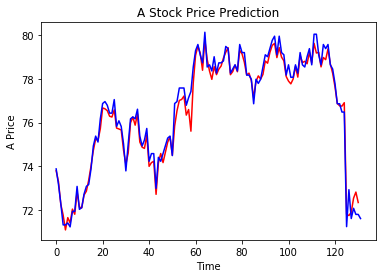

In [14]:
plt.plot(predicted_stock_price,color='red',label= 'predicted_stock_price')
plt.plot(real_stock_price,color = 'blue',label='real_stock_price')
plt.title('A Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('A Price')

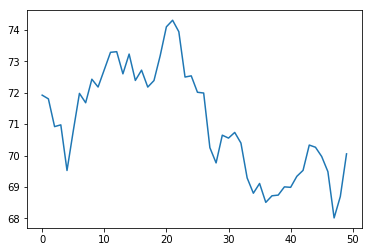

In [15]:
data_50 = pd.read_excel('A(塑化)_50天_ques.xlsx')
data_50 = data_50.iloc[:,[3,21,31,32,33,34,36,41,42,43,44,45,46]]
data_50plus = pd.concat((dataset_test,data_50),join='inner', axis = 0)
data_50plus=data_50plus.fillna(method="ffill")
final_scaled=sc.transform(data_50plus)
X_final = []
for i in range(485, 535):  # 1747 是訓練集總數
    X_final.append(final_scaled[i-7:i,0:])
X_final = np.array(X_final)
X_final = np.reshape(X_final, (X_final.shape[0], X_final.shape[1]*X_final.shape[2], 1))
predicted_stock_price = regressor.predict(X_final)
predicted_stock_price = sc1.inverse_transform(predicted_stock_price)
plt.plot(predicted_stock_price)

In [17]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)

predicted_stock_price.to_excel('A_predict.xlsx')